## Observations and Insights 

Things I still need to fix: 

- Box plots are not looking good right now - need one for each of the 4 
- Need 3 observations at the top 




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
len(pd.unique(mouse_study_df['Mouse ID']))

249

In [5]:
# Dropping the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df = mouse_study_df.drop_duplicates(subset =("Mouse ID","Timepoint"), keep = 'first')

In [6]:
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_metadata_count = mouse_study_df.count()

len(pd.unique(mouse_study_df['Mouse ID']))

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_mean = summary_tumor_vol.mean()
s1 = summary_tumor_vol_mean["Tumor Volume (mm3)"]


In [9]:
summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_median = summary_tumor_vol.median()
s2 = summary_tumor_vol_median["Tumor Volume (mm3)"]

In [10]:
summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_var = summary_tumor_vol.var()
s3 = summary_tumor_vol_var["Tumor Volume (mm3)"]

In [11]:
summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_std = summary_tumor_vol.std()
s4 = summary_tumor_vol_std["Tumor Volume (mm3)"]

In [12]:
summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_sem = summary_tumor_vol.sem()
s5 = summary_tumor_vol_sem["Tumor Volume (mm3)"]

In [13]:
sum_df = pd.DataFrame({"Mean Tumor Volume" : s1,"Median Tumor Volume" : s2,"Tumor Volume Variance" : s3,"Tumor Volume Std. Dev" : s4,"SEM of Tumor Volume" : s5})
sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line
sum_df.agg(['mean', 'median','var','std','sem'])

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,SEM of Tumor Volume
mean,50.983236,49.948493,47.787119,6.815695,0.500938
median,53.060651,51.819532,45.836079,6.767301,0.521130
var,31.621099,22.218503,256.955461,1.481573,0.010570
std,5.623264,4.713651,16.029830,1.217199,0.102812
sem,1.778232,1.490587,5.069077,0.384912,0.032512


## Bar and Pie Charts

In [15]:
#generate lists from the dataframes that give the drug list and count of timepoints tested 
mouse_study_df_g = mouse_study_df.groupby(["Drug Regimen"])
mouse_study_df_g = mouse_study_df_g.count()
drug_regimen = mouse_study_df_g.index.tolist()
timepointcount_by_drug = (mouse_study_df_g.iloc[:,4]).tolist()
mouse_study_df_drug_reg = mouse_study_df_g.loc[:,"Tumor Volume (mm3)"]


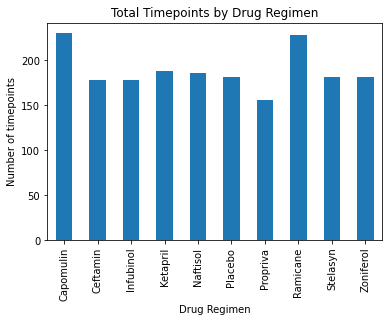

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#DataFrame.plot()  

bar_chart = mouse_study_df_drug_reg.plot.bar(title = "Total Timepoints by Drug Regimen")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of timepoints")
plt.show()

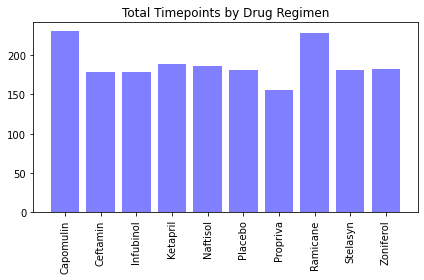

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#pyplot
x_axis = np.arange(len(timepointcount_by_drug))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.title("Total Timepoints by Drug Regimen")
plt.bar(x_axis, timepointcount_by_drug, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_regimen, rotation = 'vertical')
plt.tight_layout()

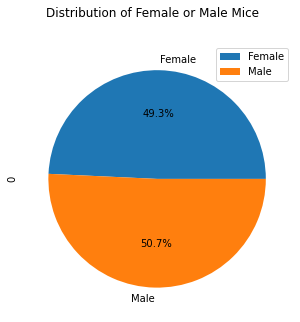

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
summary_MF = mouse_study_df.groupby (["Sex"])
summary_MF_sum = summary_MF.count()

mf_mouse = summary_MF_sum.index.tolist()
sex_count = (summary_MF_sum.iloc[:,1]).tolist()

df = pd.DataFrame(sex_count,mf_mouse)

df.plot(kind='pie', title = 'Distribution of Female or Male Mice', subplots=True, figsize=(5, 5), autopct='%1.1f%%')

plt.show()

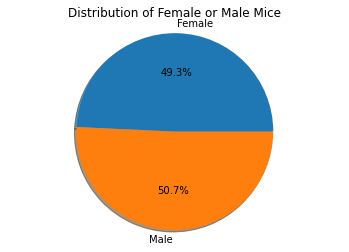

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Tell matplotlib to create a pie chart based upon the above data

plt.pie(sex_count, labels=mf_mouse, autopct="%1.1f%%", shadow=True, startangle=0)

# Create axes which are equal so we have a perfect circle
plt.title('Distribution of Female or Male Mice')

plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.show()


## Quartiles, Outliers and Boxplots

In [30]:
mouse_study_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [32]:
#Using Matplotlib, generate a box and whisker plot of the final tumor 
#   volume for all four treatment regimens and highlight any potential 
#   outliers in the plot by changing their color and style.

#Hint: All four box plots should be within the same figure. Use this Matplotlib 
# documentation page for help with changing the style of the outliers.
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mouse_study_df_4drug = mouse_study_df.loc[mouse_study_df['Drug Regimen'].isin(drug_list)]
mouse_study_df_4drug


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [23]:
mouse_study_df_4drug = mouse_study_df_4drug.groupby(["Drug Regimen","Mouse ID"])

# Start by getting the last (greatest) timepoint for each mouse
mouse_study_df_4drug_max = mouse_study_df_4drug.max()
mouse_study_df_4drug_max 


Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen Mouse ID                                              
Capomulin    b128      Female           9          22         45   
             b742        Male           7          21         45   
             f966        Male          16          17         20   
             g288        Male           3          19         45   
             g316      Female          22          22         45   
...                       ...         ...         ...        ...   
Ramicane     s508        Male           1          17         45   
             u196        Male          18          25         45   
             w678      Female           5          24          5   
             y449        Male          19          24         15   
             z578        Male          11          16         45   

                       Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen Mouse ID                                        
Capomulin    b128               45.651331                 2  
             b742               45.000000                 0  
             f966               45.000000                 0  
             g288               46.304003                 1  
             g316               46.809225                 2  
...                                   ...               ...  
Ramicane     s508               45.000000                 0  
             u196               47.622816                 3  
             w678               45.000000                 0  
             y449               46.378092                 0  
             z578               45.000000                 0  

[100 rows x 6 columns]

In [38]:
drug_regimen = mouse_study_df_g.index.tolist()
maxtimepoint_vol_by_mouse = (mouse_study_df_4drug_max.iloc[:,4]).tolist()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_study_df_4drug = pd.merge(mouse_study_df_4drug,mouse_study_df_4drug_max, on="Mouse ID")


mouse_study_df_4drug.rename(columns = {'Sex_x' : 'Sex', 'Age_months_x' : 'Age Months', 'Weight (g)_x' : 'Weight', 'Timepoint_x' : 'Timepoint', 'Tumor Volume (mm3)_x'}, inplace = True)

#mouse_study_df_4drug_max[(mouse_study_df_4drug_max["Tumor Volume (mm3)"] >= 36.321) & (mouse_study_df_4drug_max["Tumor Volume (mm3)"] <= 36.322)]


,Mouse ID,Drug Regimen,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,Male,21,16,45,45.000000,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,Male,21,16,45,45.000000,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,Male,21,16,45,45.000000,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,Male,21,16,45,45.000000,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,Male,21,16,45,45.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,Female,24,25,45,62.754451,3
810,z581,Infubinol,Female,24,25,30,56.286750,2,Female,24,25,45,62.754451,3
811,z581,Infubinol,Female,24,25,35,58.628399,3,Female,24,25,45,62.754451,3
812,z581,Infubinol,Female,24,25,40,60.053740,3,Female,24,25,45,62.754451,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = (mouse_study_df_g.iloc[:,4]).quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
# pull out the outliers 
# outliers = mouse_study_df_g.loc[(DF['COL'] < lower_bound) | (DF['COL'] > upper_bound)]
# outliers
    

The lower quartile is: 178.75
The upper quartile is: 187.5
The interquartile range is: 8.75
The the median is: 181.5 
Values below 165.625 could be outliers.
Values above 200.625 could be outliers.


In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

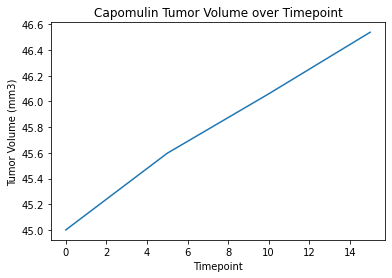

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug_list = ["Capomulin"]
mouse_study_df_capomulin = mouse_study_df.loc[mouse_study_df['Drug Regimen'].isin(drug_list)]
mouse_id = ['r157']
mouse_study_df_capomulin_r157 = mouse_study_df.loc[mouse_study_df['Mouse ID'].isin(mouse_id)]

x_axis = mouse_study_df_capomulin_r157["Timepoint"]
y_axis = mouse_study_df_capomulin_r157["Tumor Volume (mm3)"]

plt.title("Capomulin Tumor Volume over Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

plt.plot(x_axis, y_axis)
# Show the graph that we have created
plt.show()

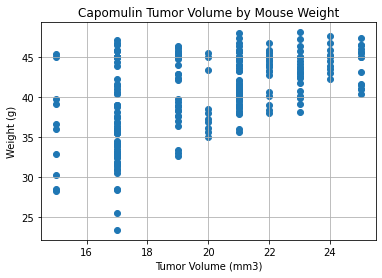

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

x_axis = mouse_study_df_capomulin["Weight (g)"]
y_axis = mouse_study_df_capomulin["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("Capomulin Tumor Volume by Mouse Weight")
plt.ylabel("Weight (g)")
plt.xlabel("Tumor Volume (mm3)")
plt.grid(True)

# Show plot
plt.show()

## Correlation and Regression

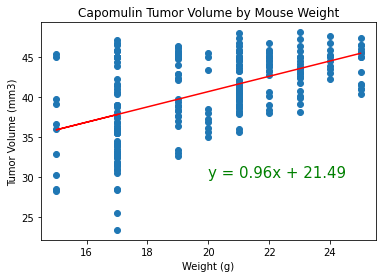

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_study_df_capomulin["Weight (g)"]
y_values = mouse_study_df_capomulin["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title("Capomulin Tumor Volume by Mouse Weight")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="green")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
